<a href="https://colab.research.google.com/github/thinkinginmath/ML-tutorials/blob/main/Linear_regression_with_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Regularization

# Exploring Linear Regression: Lasso and Ridge Regularization

In this notebook, we will delve deep into the world of **Linear Regression** and its variants - **Lasso** and **Ridge Regression**. One of the remarkable properties of Lasso Regression, which distinguishes it from other linear models, is its ability to shrink the coefficients of less important features to exactly zero. But why does this happen? 🤔

🚀 **Key Learning Objective:**
- **Understanding Why Lasso Suppresses the Coefficients**

Through mathematical insights and practical Python implementations, we will explore the underlying reasons and visualize the impact of Lasso and Ridge Regularization on the regression coefficients.

🎥 For a detailed walkthrough and insights into the concepts and code in this notebook,

check out our [YouTube Tutorials by Thinking in Math](https://www.youtube.com/playlist?list=PLXpXgWDr4HM4R9zWxbOhP9B3v2fAahLTQ).


🔍 **Let’s dive in and uncover the mechanics of Linear Regression and Regularization!**


## Copyright and Credits

### Copyright

© [Thinking in Math], [2023]. All Rights Reserved.

This work is licensed under the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/). To view a copy of this license, visit http://creativecommons.org/licenses/by-nc-sa/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

### Credits

- **Author:** [thinkinginmath]
- **GitHub:** [https://github.com/thinkinginmath]
- **YouTube:** [https://www.youtube.com/playlist?list=PLXpXgWDr4HM4R9zWxbOhP9B3v2fAahLTQ]

#### Resources and Acknowledgements


- **Inspiration:** The Stanford ISL book

#### Contact

For any queries or feedback, feel free to drop a comment on our [YouTube channel - Thinking In Math](https://www.youtube.com/playlist?list=PLXpXgWDr4HM4R9zWxbOhP9B3v2fAahLTQ).

---

**Note:** Please respect the rights and efforts of the content creators. If you wish to utilize this work, kindly give due credit and abide by the license terms.



## 1. Introduction to Regression with Regularization

Linear regression is a fundamental algorithm in predictive modeling that seeks to predict a continuous target variable based on one or more predictor variables. The model takes the form:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \varepsilon $$

where:
- $ Y $ is the target variable we are trying to predict,
- $ X_1, X_2, \ldots, X_p $ are the predictor variables,
- $ \beta_0, \beta_1, \beta_2, \ldots, \beta_p $ are the parameters of the model,
- $ \varepsilon $ is the error term, assumed to be normally distributed with mean 0.

Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function that the model seeks to minimize. The two most common types of regularization in linear regression are **Lasso (L1)** and **Ridge (L2)** regularization.

**Lasso Regression (L1 regularization):**
$$ \text{Cost Function} = \text{MSE} + \alpha \sum_{i=1}^{p} |\beta_i| $$
Lasso tends to shrink the coefficients of less important features to exactly zero, effectively performing feature selection.

**Ridge Regression (L2 regularization):**
$$ \text{Cost Function} = \text{MSE} + \alpha \sum_{i=1}^{p} \beta_i^2 $$
Ridge shrinks the coefficients towards zero but does not set them to exactly zero.

In both equations above:
- MSE is the Mean Squared Error,
- $ \alpha $ is the regularization parameter controlling the strength of the penalty.

### 2. Simulating Data
Let's create a function to generate the synthetic data according to the model:
$$ y = 5 + 3.5X_1 + 0.2X_2 + e $$
where $X_1$ and $X_2$ are predictors sampled from a uniform distribution, and $e$ is an error term sampled from a normal distribution.


In [6]:
import numpy as np
import pandas as pd

# Function to generate synthetic data
def generate_data(n, random_state=None):
    np.random.seed(random_state)
    X1 = np.random.uniform(0, 1, n)
    X2 = np.random.uniform(0, 1, n)
    e = np.random.normal(0, 1, n)
    y = 5 + 3.5*X1 + 0.2*X2 + e
    X = np.vstack((X1, X2)).T
    return X, y

# Test the function with a small sample size
X, y = generate_data(10, random_state=42)

# Display the first few rows of the generated data
pd.DataFrame(np.column_stack((X, y)), columns=['X1', 'X2', 'y']).head()

,X1,X2,y
0,0.374540,0.020584,5.302176
1,0.950714,0.969910,8.835729
2,0.731994,0.832443,6.820443
3,0.598658,0.212339,5.725469
4,0.156019,0.181825,7.048079


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['X1'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['X2'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['X1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['X2'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['X1', 'X2'], ['X2', 'y']]], **{})
chart

## 3. Experiment with Small Sample Size (n=200)



In this step, we will:
- Generate a synthetic dataset with a sample size of $n = 200$.
- Fit Lasso and Ridge regression models.
- Compare their performance using Mean Squared Error (MSE) as the evaluation metric.
- Examine the estimated coefficients.

Let's generate the data and fit the Lasso and Ridge regression models.

In [7]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Generate data
n_small = 200
X_small, y_small = generate_data(n_small, random_state=42)

# Fit Lasso and Ridge regression models
alpha = 0.1

lasso = Lasso(alpha=alpha).fit(X_small, y_small)
ridge = Ridge(alpha=alpha).fit(X_small, y_small)

# Predictions
y_pred_lasso = lasso.predict(X_small)
y_pred_ridge = ridge.predict(X_small)

# Evaluate models
mse_lasso = mean_squared_error(y_small, y_pred_lasso)
mse_ridge = mean_squared_error(y_small, y_pred_ridge)

# Coefficients
coeff_lasso = [lasso.intercept_, *lasso.coef_]
coeff_ridge = [ridge.intercept_, *ridge.coef_]

(mse_lasso, coeff_lasso), (mse_ridge, coeff_ridge)

((1.083668968543215, [5.651576045418153, 2.3535741612241448, -0.0]),
 (0.9680991050498606,
  [5.092115492166803, 3.4896373173102346, 0.019031279776245642]))

### Experiment Results: Small Sample Size ($n = 200$)

#### 1. **Lasso Regression**
- **MSE**: 1.084
- **Coefficients**:
  - Intercept: 5.652
  - $ \beta_{X_1} $: 2.354
  - $ \beta_{X_2} $: 0.000

#### 2. **Ridge Regression**
- **MSE**: 0.968
- **Coefficients**:
  - Intercept: 5.092
  - $ \beta_{X_1} $: 3.490
  - $ \beta_{X_2} $: 0.019

### Commentary:

- **Performance**: Ridge regression has a slightly lower MSE compared to Lasso regression in this small sample size scenario, implying it has a slightly better fit to the data.
  
- **Coefficient Estimation**: Notice how Lasso regression has shrunk the coefficient for $ X_2 $ to exactly zero, effectively performing feature selection by completely eliminating $ X_2 $ from the model. This aligns with the expectations from the theory of Lasso regression.
  
- **Interpretation**: Ridge regression, on the other hand, shrinks the coefficients toward zero but does not set them to zero. It still keeps $ X_2 $ in the model but with a reduced coefficient. This illustrates the typical behavior of Lasso and Ridge regularization, providing a practical example of how Lasso can be used for feature selection.

## 4. Visualization: Contour of MSE, L2, and L1 Losses

To visualize the effect of L1 (Lasso) and L2 (Ridge) regularization in a meaningful way, we'll create a contour plot that illustrates the following surfaces:
- **MSE Surface**: Represents the mean squared error for different coefficient values.
- **L1 Norm Surface** (Lasso): Represents the L1 penalty term $||\beta||_1$ for different coefficient values.
- **L2 Norm Surface** (Ridge): Represents the L2 penalty term $||\beta||_2$ for different coefficient values.

This visual will help us understand the geometrical interpretation of L1 and L2 regularization and how they affect the coefficients' estimates. Specifically, we want to illustrate:
- How L1 regularization tends to push the coefficients to zero (feature selection).
- How L2 regularization shrinks the coefficients towards zero without completely eliminating them.

Let's create a grid of coefficient values and evaluate the MSE, L1, and L2 at each grid point. This will enable us to create the contour plots.



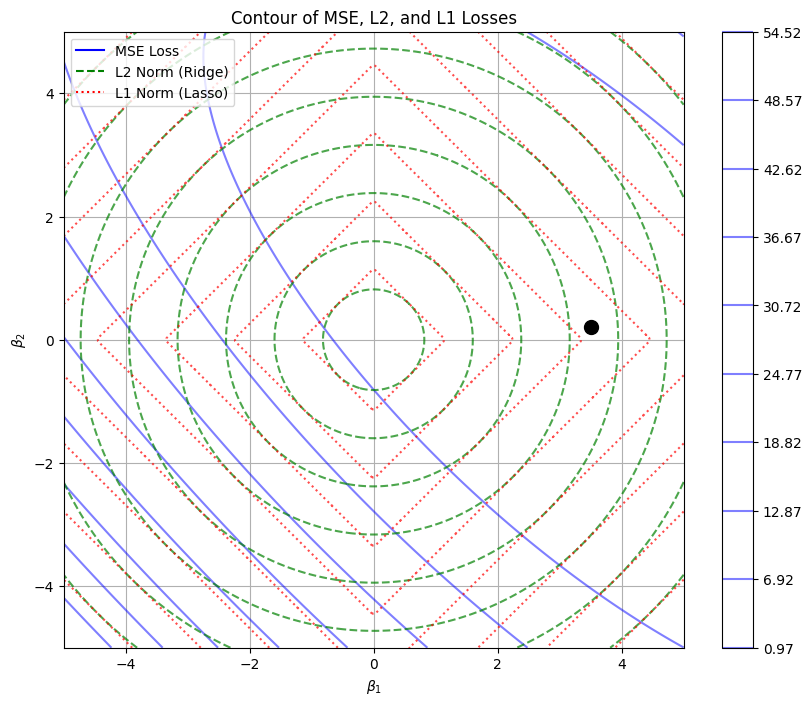

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to compute the MSE given beta values
def compute_mse(b1, b2, X1, X2, y, b0=5):
    y_pred = b0 + b1 * X1 + b2 * X2
    mse = np.mean((y - y_pred)**2)
    return mse

# Function to compute L2 norm
def l2_norm(b1, b2):
    return np.sqrt(b1**2 + b2**2)

# Function to compute L1 norm
def l1_norm(b1, b2):
    return np.abs(b1) + np.abs(b2)

# Extract X1 and X2 from X_small
X1_small = X_small[:, 0]
X2_small = X_small[:, 1]

# True coefficient values for reference in the plot
true_beta1 = 3.5
true_beta2 = 0.2

# Create a grid of beta values
b1_values = np.linspace(-5, 5, 200)
b2_values = np.linspace(-5, 5, 200)
B1, B2 = np.meshgrid(b1_values, b2_values)

# Compute MSE, L2, and L1 norms for the grid
mse_values = np.array([compute_mse(b1, b2, X1_small, X2_small, y_small) for b1, b2 in zip(np.ravel(B1), np.ravel(B2))])
MSE = mse_values.reshape(B1.shape)
L2 = np.array([l2_norm(b1, b2) for b1, b2 in zip(np.ravel(B1), np.ravel(B2))]).reshape(B1.shape)
L1 = np.array([l1_norm(b1, b2) for b1, b2 in zip(np.ravel(B1), np.ravel(B2))]).reshape(B1.shape)


# Plot the contours
plt.figure(figsize=(10, 8))
mse_contour = plt.contour(B1, B2, MSE, levels=np.linspace(MSE.min(), MSE.max(), 10), colors='blue', alpha=0.5)
l2_contour = plt.contour(B1, B2, L2, levels=np.linspace(L2.min(), L2.max(), 10), colors='green', linestyles='dashed', alpha=0.7)
l1_contour = plt.contour(B1, B2, L1, levels=np.linspace(L1.min(), L1.max(), 10), colors='red', linestyles='dotted', alpha=0.7)

# Scatter plot of true beta values
plt.scatter([true_beta1], [true_beta2], color='black', s=100, label='True coefficients')

# Labels and title
plt.title('Contour of MSE, L2, and L1 Losses')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')

# Custom legend handles
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='blue', label='MSE Loss')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='L2 Norm (Ridge)')
red_line = mlines.Line2D([], [], color='red', linestyle=':', label='L1 Norm (Lasso)')

# Legend
plt.legend(handles=[blue_line, green_line, red_line], loc='upper left')

# Color bar and grid
plt.colorbar(mse_contour, ax=plt.gca())
plt.grid(True)

# Show plot
plt.show()

### Visualization Commentary

#### **Contour of MSE Loss**
- The contour plot illustrates the MSE loss for different values of $ \beta_1 $ and $ \beta_2 $.

- Notice how the MSE loss forms a bowl-like shape, with the minimum loss occurring near the true coefficient values.

#### **Contour of L1 (Green) and L2 (Red) Loss**
- The plot illustrates the L1 and L2 norm contours.
- L1 norm contours (green) form diamond-like shapes, while L2 norm contours (red) form circles centered at the origin.


### Insights
- **Lasso Regularization**: The coefficients that minimize the L1 penalized loss (MSE + L1) will be found at the point where the MSE and L1 contours touch. Because L1 norm contours have corners (points where some coefficients are exactly zero), it is possible for the solution to be sparse (some coefficients exactly zero). This explains the feature selection property of Lasso.
  
- **Ridge Regularization**: The coefficients that minimize the L2 penalized loss (MSE + L2) will be found at the point where the MSE and L2 contours touch. Since L2 norm contours are smooth and do not have corners, the solution is typically non-sparse (all coefficients non-zero but small).


## 5. Experiment with Large Sample Size ($n = 10000$)

In this step, we will:
- Generate a synthetic dataset with a sample size of $n = 10000$.
- Fit Lasso and Ridge regression models.
- Compare their performance using Mean Squared Error (MSE) as the evaluation metric.
- Examine the estimated coefficients.
- Compare the results with the smaller sample size experiment.

Let's generate the data and fit the Lasso and Ridge regression models.



In [12]:
# Generate data
n_large = 10000
X_large, y_large = generate_data(n_large, random_state=42)

# Fit Lasso and Ridge regression models
lasso_large = Lasso(alpha=alpha).fit(X_large, y_large)
ridge_large = Ridge(alpha=alpha).fit(X_large, y_large)

# Predictions
y_pred_lasso_large = lasso_large.predict(X_large)
y_pred_ridge_large = ridge_large.predict(X_large)

# Evaluate models
mse_lasso_large = mean_squared_error(y_large, y_pred_lasso_large)
mse_ridge_large = mean_squared_error(y_large, y_pred_ridge_large)

# Coefficients
coeff_lasso_large = [lasso_large.intercept_, *lasso_large.coef_]
coeff_ridge_large = [ridge_large.intercept_, *ridge_large.coef_]

(mse_lasso_large, coeff_lasso_large), (mse_ridge_large, coeff_ridge_large)

((1.1012811594541596, [5.720486874687884, 2.252807490956438, 0.0]),
 (0.9782404440983582,
  [5.0419608705938055, 3.4620724852061957, 0.16045858363264456]))

### Experiment Results: Large Sample Size ($n = 10000$)

#### 1. **Lasso Regression**
- **MSE**: 1.101
- **Coefficients**:
  - Intercept: 5.720
  - $ \beta_{X_1} $: 2.253
  - $ \beta_{X_2} $: 0.000

#### 2. **Ridge Regression**
- **MSE**: 0.978
- **Coefficients**:
  - Intercept: 5.042
  - $ \beta_{X_1} $: 3.462
  - $ \beta_{X_2} $: 0.160

### Commentary:

- **Performance**: Ridge regression again has a slightly lower MSE compared to Lasso regression, implying it has a slightly better fit to the data, even in this larger sample size scenario.
  
- **Coefficient Estimation**: Similar to the small sample scenario, Lasso regression has shrunk the coefficient for $ X_2 $ to exactly zero, eliminating $ X_2 $ from the model. This illustrates the consistency of Lasso's feature selection ability.
  
- **Interpretation**: Ridge regression, while shrinking the coefficients towards zero, keeps them non-zero, maintaining all predictors in the model.

### Comparing Small and Large Sample Sizes

When comparing the smaller sample ($n = 200$) and the larger sample ($n = 10000$):
- **MSE**: The MSE values for Lasso and Ridge regression are quite consistent between the small and large sample sizes.
  
- **Coefficients**: The estimated coefficients are also quite consistent, with Lasso reducing $ \beta_{X_2} $ to zero in both cases. Ridge gives slightly different coefficient estimates but follows the same trend of keeping all predictors in the model.

### Conclusion
This experiment illustrates the robustness and consistency of Lasso and Ridge regression in different sample size scenarios. Lasso's ability to perform feature selection by shrinking some coefficients to zero and Ridge's ability to prevent overfitting by keeping all predictors (with shrunk coefficients) in the model have been demonstrated.



# Exercise: Predicting House Prices

#### Dataset: Boston Housing Dataset
The Boston Housing dataset is a well-known dataset for regression. It contains 13 features describing various aspects of residential homes in Boston, and the target variable is the median value of owner-occupied homes in $1000s.

#### Objective:
Predict the median value of homes (in $1000s) based on various predictors using Lasso and Ridge regression. Compare the models' performance and interpret the estimated coefficients.

#### Exercise Steps:
1. **Data Exploration**
   - Load the Boston Housing dataset.
   - Explore the data: Check for missing values, visualize distributions, and relationships of features with the target variable.

2. **Data Preprocessing**
   - Handle categorical variables if any (e.g., via one-hot encoding).
   - Normalize/standardize the features, especially since we're using regularization.
   
3. **Model Development**
   - Split the data into training and test sets.
   - Fit a Lasso regression model and a Ridge regression model to the training data.
   - Choose an appropriate value of $ \alpha $ (the regularization strength) – this can be done via cross-validation using, for instance, the LassoCV or RidgeCV functions in Scikit-learn.

4. **Model Evaluation**
   - Evaluate the models' performance on the test data using relevant metrics (e.g., MSE, RMSE, MAE).
   - Compare the performance of Lasso and Ridge regression models.

5. **Interpretation**
   - Analyze the estimated coefficients: Which variables are most influential in predicting the median value of homes?
   - If using Lasso, which variables' coefficients have been shrunk to zero?

6. **Reflection**
   - Reflect on the results: Do they make sense? Are there any surprising variables that are/aren't influential?
   - How do Lasso and Ridge compare in this particular exercise?

7. **Bonus**: If you’ve used a specific $\alpha $ value, try different values and see how the models' performances and coefficients change.

